<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:**Alan Jose Maldonado Garcia.

**Fecha:** 10 de octubre del 2023.

**Expediente** : 732884.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: Link con el enlace del repositorio del creador del proyecto

# Tarea 6: Clase 10

### Ejercicio 1:

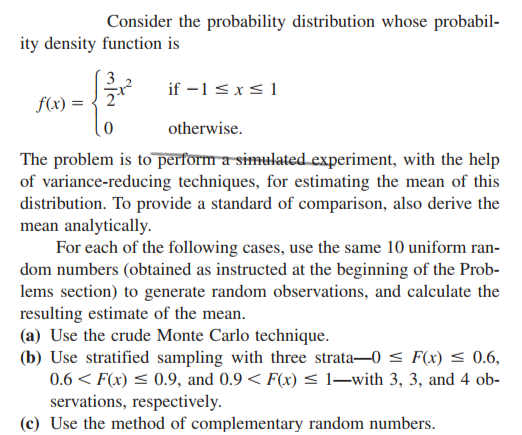

Además use el método de estratificación donde se divide en B estratos, visto la clase pasada y compare el resultado con los métodos anteriores cuando se toman $2,4,6,10$ estratos respectivamente, concluya.

Código de solución estudiante 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Integración montecarlo
def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

In [3]:
def m_estratificado(a, b, B):
    Ui = np.random.uniform(a, b, B)
    Bi = np.arange(0, B)
    Ui_estra = (Ui + Bi) / B
    return Ui_estra

In [4]:
# np.random.seed(514)
# Programar función h(x)
h = lambda x: 0 if x < -1 else (3/2 * x**2 if -1<= x < 1 else 0)
h = np.vectorize(h, otypes=[float])
a=-1;b=1
N = 10
# aproximar el valor de la integral usando montecarlo típico

u1 = np.random.rand(N)
media_montecarlo = h(u1).mean()

# Aproximación usando método de los números complementarios
# Nota: Para ser justos tome la misma cantidad de términos para efectos de comparación
u2 = np.random.rand(int(N/2))
u2_c = 1 - u2
media_complementario = h(np.concatenate([u2, u2_c])).mean()




In [5]:
# intervalo de integración
a = -1; b = 1

# Cantidad de términos, en escala logarítmica
N = np.linspace(2,4,6,10,dtype=int)

# Definimos la tabla donde se mostrarán los resultados
columns=['Estratificado_Estandar']
df = pd.DataFrame(index=N, columns=columns, dtype='float')
df.index.name = "Cantidad_estratos"

# Números aleatorios dependiente de la cantidad de términos N - estratificado
ui_estra = list(map(lambda n: m_estratificado(a, b, n), N))

I_m_rv = list(map(lambda Y:int_montecarlo(lambda x:h(x),a,b,Y),ui_estra))

# Mostramos los resultados en la tabla previamente creada
df["Estratificado_Estandar"] = I_m_rv


In [6]:
print('Media usando montecarlo estándar     =',media_montecarlo)
print('Media usando números complementarios =',media_complementario)
print('Media usando estratificado estándar=',df["Estratificado_Estandar"].mean())

Media usando montecarlo estándar     = 0.5838234376842489
Media usando números complementarios = 0.47481173875273547
Media usando estratificado estándar= 0.5187684489610526


**Resultados en markdown:**

Media usando montecarlo estándar     = 0.529685241214175

Media usando números complementarios = 0.5067687806294527

Media usando estratificado estándar= 0.573427140785602

Código de solución estudiante 2

### Ejercicio 2:

Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}e^{x^2}\text{d}x\approx 1.46265$$

Pasos
1. Cree una función que realice el método de muestreo estratíficado (igualmente espaciado), recibiendo como  parámetros de entrada la cantidad de estratos, los valores a y b en los cuales se deben de generar los números aletorios y retornando las variables estratíficadas correspondientes.
2. Cree una función que realice el método de muestreo estratíficado (con intervalos no igualmente espaciados), recibiendo como parámetro la cantidad de términos que se tienen que generar en cada estrato y regrese las variables aleatorias estratificadas correspondientes.
2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente tabla:

| Cantidad de términos | Montecarlo crudo | Error 1% | Montecarlo estratíficado 1 | Error 2 % | Montecarlo estratíficado 2 | Error 3 % |
|:--------------------:|:----------------:|:--------:|:--------------------------:|:---------:|:--------------------------:|:---------:|
|          10          |                  |          |                            |           |                            |           |
|          100         |                  |          |                            |           |                            |           |
|         1000         |                  |          |                            |           |                            |           |
|         10000        |                  |          |                            |           |                            |           |
|        100000        |                  |          |                            |           |                            |           |
|        1000000       |                  |          |                            |           |                            |           |

Código de solución estudiante 1

In [8]:
I = 1.46265
# intervalo de integración
a = 0; b = 1

# Cantidad de términos, en escala logarítmica
N = np.logspace(1,7,7,dtype=int)

# Definimos la tabla donde se mostrarán los resultados
columns=['Montecarlo_crudo', 'Estratificado_Estandar']
df = pd.DataFrame(index=N, columns=columns, dtype='float')
df.index.name = "Cantidad_terminos"

# Números aleatorios dependiente de la cantidad de términos N
ui = list(map(lambda n:np.random.uniform(a,b,n),N))

# Números aleatorios dependiente de la cantidad de términos N - estratificado
ui_estra = list(map(lambda n: m_estratificado(a, b, n), N))

# Calculamos la aproximación por montecarlo dependiendo de la cantidad de
# términos que hayamos creado con ui
I_m = list(map(lambda Y:int_montecarlo(lambda x:np.exp(x**2),a,b,Y),ui))

I_m_rv = list(map(lambda Y:int_montecarlo(lambda x:np.exp(x**2),a,b,Y),ui_estra))

# Mostramos los resultados en la tabla previamente creada
df["Montecarlo_crudo"] = I_m
df["Estratificado_Estandar"] = I_m_rv
df["Error_Montecarlo%"] = np.abs(df["Montecarlo_crudo"] - I) * 100 / I
df["Error_Estratificado_1%"] = np.abs(df["Estratificado_Estandar"] - I) * 100 / I

df

,Montecarlo_crudo,Estratificado_Estandar,Error_Montecarlo%,Error_Estratificado_1%
Cantidad_terminos,,,,
10,1.431758,1.470055,2.112062,0.506261
100,1.449230,1.463839,0.917495,0.081258
1000,1.455084,1.462629,0.517291,0.001427
10000,1.462523,1.462652,0.008649,0.000132
100000,1.462844,1.462652,0.013281,0.000122
1000000,1.462329,1.462652,0.021980,0.000119
10000000,1.462914,1.462652,0.018030,0.000119
